In [1]:
# Cell 1 -  Setup: imports and notebook display settings
%matplotlib inline
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 100   # Disply quilaty in notebook

# Output folder for saved images
os.makedirs('plots', exist_ok=True)
print("Ready. plots/ folder created (if not exists).")

Ready. plots/ folder created (if not exists).


In [2]:
# Cell  1 - Load dataset  and quick check
path = "C:\\Users\\Love\\Desktop\\EDA analysis\\Tasks\\eda_results\\cleaned_stock_prices.csv"
df = pd.read_csv(path)
print("Shape:", df.shape)
display(df.head())

Shape: (497472, 7)


,symbol,date,open,high,low,close,volume
0,aal,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,aapl,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,aap,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,abbv,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,abc,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [3]:
# Cell 2 - Ensure data type + sort which is important for time series
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print("NaT in date:", df['date'].isnull().sum())
df = df.sort_values(['symbol', 'date',]).reset_index(drop=True)

NaT in date: 0


In [4]:
# Cell 3 - Compute daily returns this is required for many visualization
df['return'] = df.groupby('symbol')['close'].pct_change()
print("Return column created. NaNs in return:", df['return'].isnull())
display(df[['symbol', 'date', 'close', 'return']].head(8))

Return column created. NaNs in return: 0          True
1         False
2         False
3         False
4         False
          ...  
497467    False
497468    False
497469    False
497470    False
497471    False
Name: return, Length: 497472, dtype: bool


,symbol,date,close,return
0,a,2014-01-02,56.21,NaN
1,a,2014-01-03,56.92,0.012631
2,a,2014-01-06,56.64,-0.004919
3,a,2014-01-07,57.45,0.014301
4,a,2014-01-08,58.39,0.016362
5,a,2014-01-09,58.41,0.000343
6,a,2014-01-10,58.93,0.008903
7,a,2014-01-13,58.93,0.000000


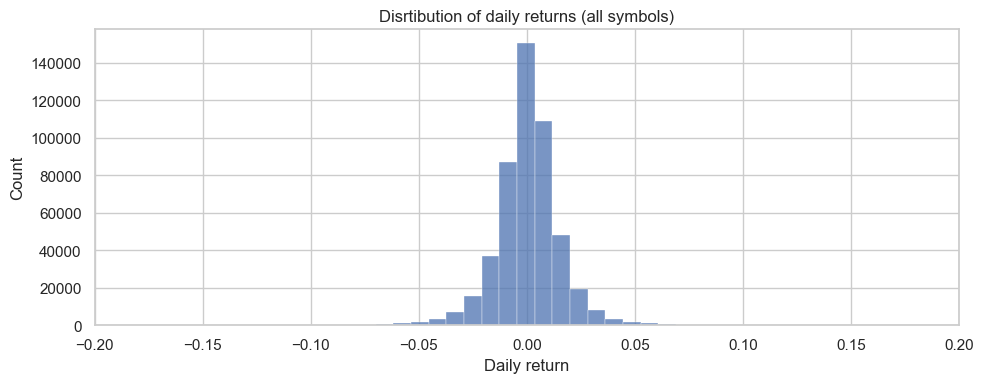

In [5]:
# Cell 4 - Histogram of returns (Distribution)
plt.figure(figsize=(10,4))
sns.histplot(df['return'].dropna(), bins=200)
plt.xlim(-0.2, 0.2)     # this is for zoom adjust for as needed
plt.title("Disrtibution of daily returns (all symbols)")
plt.xlabel("Daily return")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

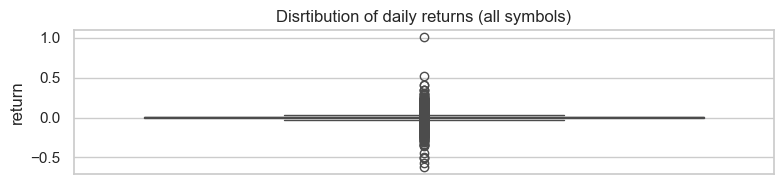

In [6]:
# Cell 5 - Boxplot of returns
plt.figure(figsize=(8,2))
sns.boxplot(df['return'].dropna())
plt.title("Disrtibution of daily returns (all symbols)")
plt.tight_layout()
plt.show()

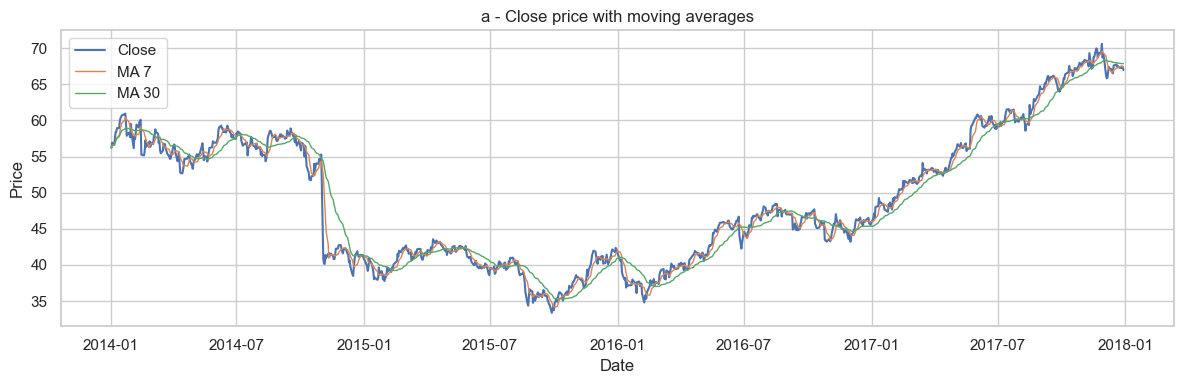

In [7]:
# Cell 6 - Line Chart (Time series) for one symbol for close price + moving averages
sym = df['symbol'].value_counts().index[0]
sub = df[df['symbol']==sym].sort_values('date').copy()
sub['ma7'] = sub['close'].rolling(7, min_periods=1).mean()
sub['ma30'] = sub['close'].rolling(30, min_periods=1).mean()

plt.figure(figsize=(12,4))
plt.plot(sub['date'], sub['close'], label='Close')
plt.plot(sub['date'], sub['ma7'], label='MA 7', linewidth=1)
plt.plot(sub['date'], sub['ma30'], label='MA 30', linewidth=1)
plt.title(f"{sym} - Close price with moving averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

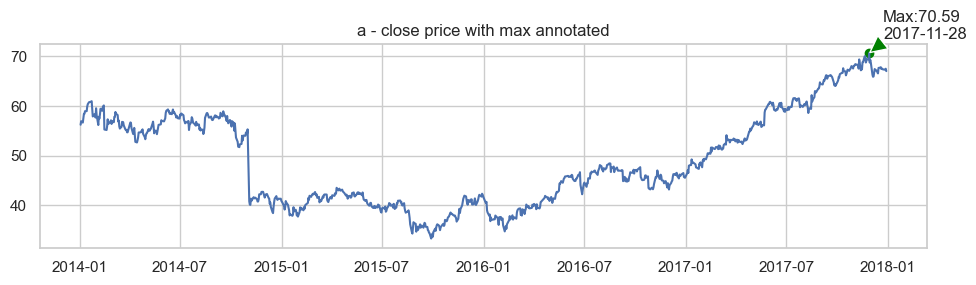

In [8]:
# Cell 7 - Annotate max close point (This is optional but for information we do it)
max_row =  sub.loc[sub['close'].idxmax()]
plt.figure(figsize=(10,3))
plt.plot(sub['date'], sub['close'])
plt.scatter([max_row['date']], [max_row['close']], color='green')
plt.annotate(
    f"Max:{max_row['close']:.2f}\n{max_row['date'].date()}",
    xy=(max_row['date'], max_row['close']),
    xytext=(10,10), 
    textcoords='offset points',
    arrowprops=dict(facecolor='green', shrink=0.05)
)
plt.title(f"{sym} - close price with max annotated")
plt.tight_layout()
plt.show()

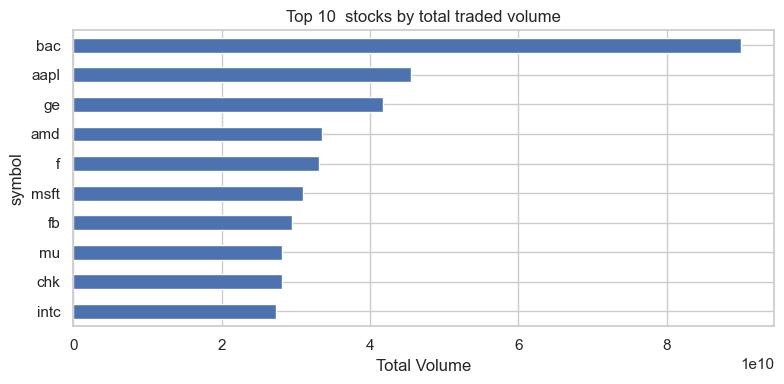

In [9]:
# Cell 8 - Horizontal bar plot: Top 10 stocks by total traded volume
top_vol = df.groupby('symbol')['volume'].sum().nlargest(10)
plt.figure(figsize=(8,4))
top_vol.sort_values().plot(kind='barh')      # For Horizontal Bar
plt.xlabel("Total Volume")
plt.title("Top 10  stocks by total traded volume")
plt.tight_layout()
plt.show()

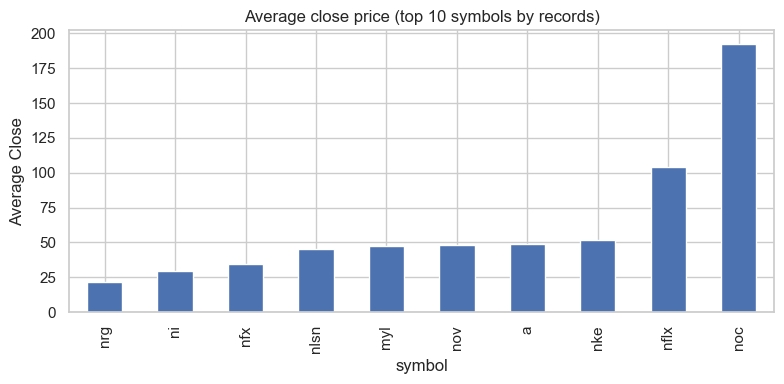

In [10]:
# Cell 9 - Bar plot: mean close price per symbol (top 10)
top10 = df['symbol'].value_counts().head(10).index.tolist()
mean_close = df[df['symbol'].isin(top10)].groupby('symbol')['close'].mean().sort_values()
plt.figure(figsize=(8,4))
mean_close.plot(kind='bar')
plt.title("Average close price (top 10 symbols by records)")
plt.ylabel("Average Close")
plt.tight_layout()
plt.show()

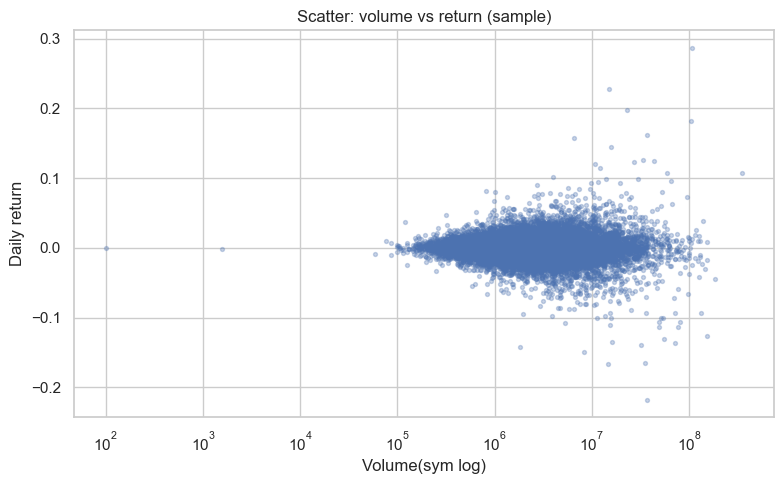

In [11]:
# Cell 10 - Scatter plot: return vs volume (sampled) — relation check
sample = df.dropna(subset=['return','volume']).sample(min(20000, len(df.dropna(subset=['return','volume']))),random_state=2)
plt.figure(figsize=(8,5))
plt.scatter(sample['volume'], sample['return'], alpha=0.3, s=8)
plt.xscale('symlog')
plt.xlabel("Volume(sym log)")
plt.ylabel("Daily return")
plt.title("Scatter: volume vs return (sample)")
plt.tight_layout()
plt.show()

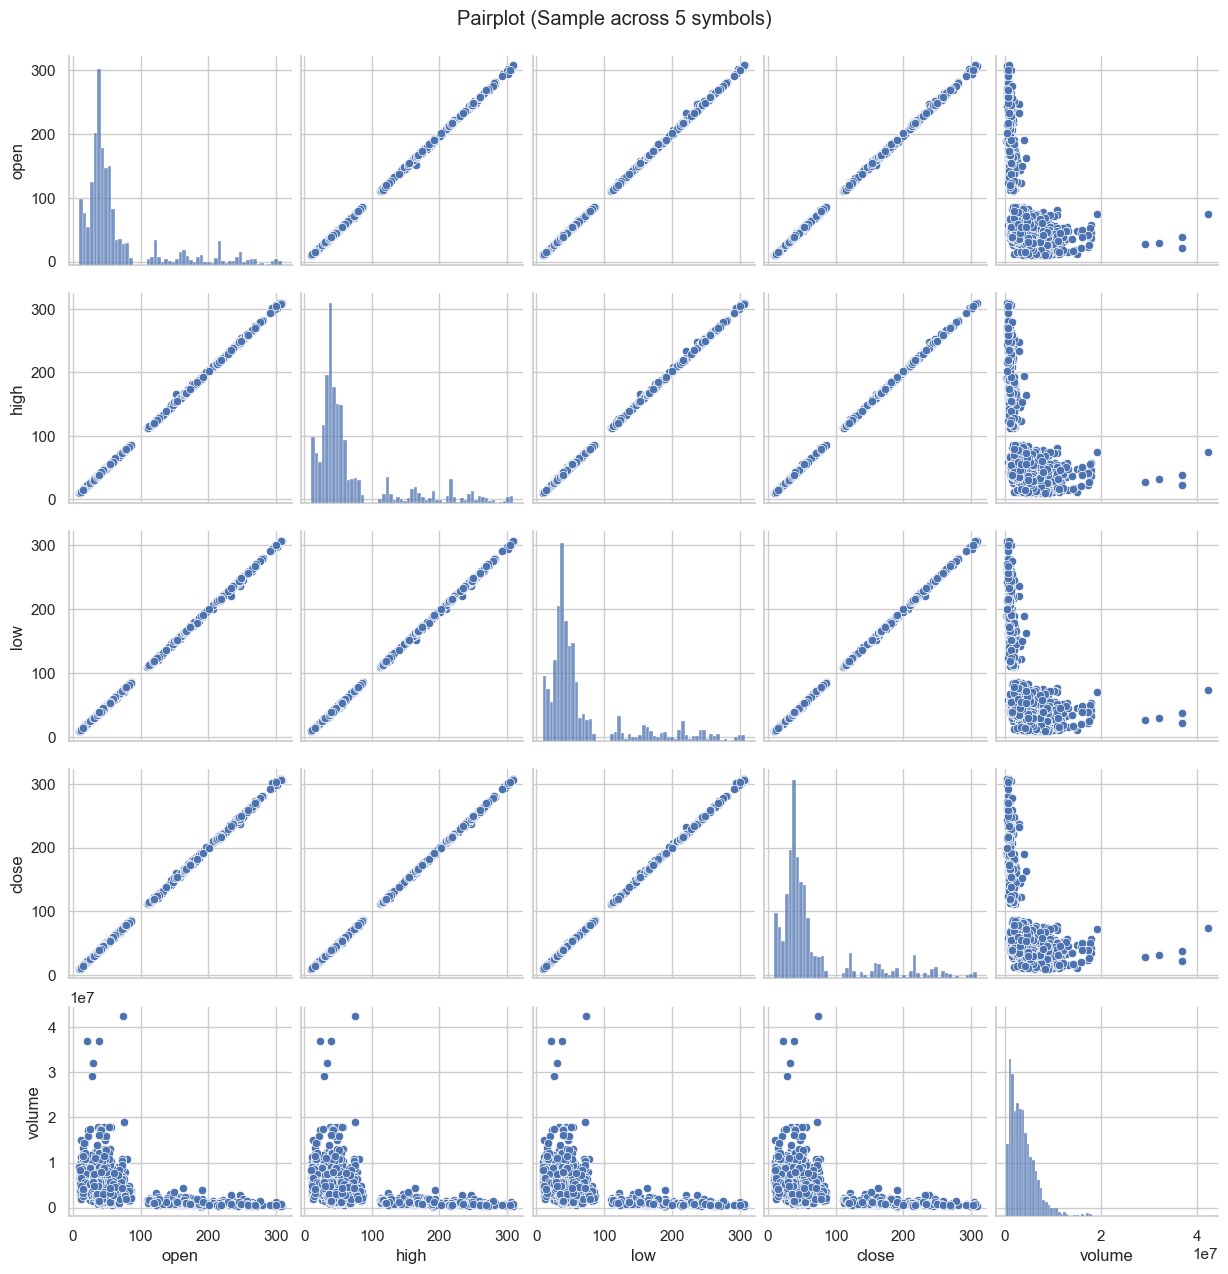

In [12]:
# Cell 11 - Pairplot for small subset (pairwise relationships)
subset_syms = df['symbol'].value_counts().head(5).index.tolist()
sample2 = df[df['symbol'].isin(subset_syms)].sample(2000, random_state=1)
sns.pairplot(sample2[['open','high','low','close','volume']])
plt.suptitle("Pairplot (Sample across 5 symbols)", y=1.02)
plt.show()

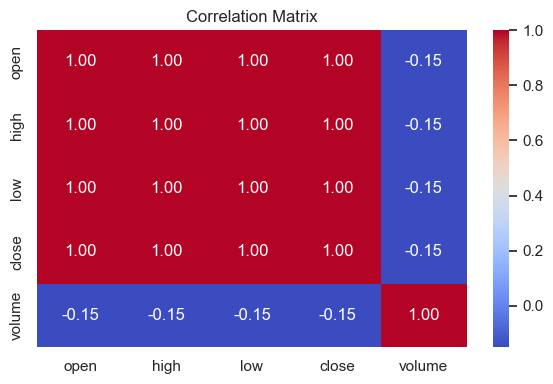

In [13]:
# Cell 12 - Correlation heatmap (numeric columns)
num_cols = ['open','high','low','close','volume']
corr = df[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show() 

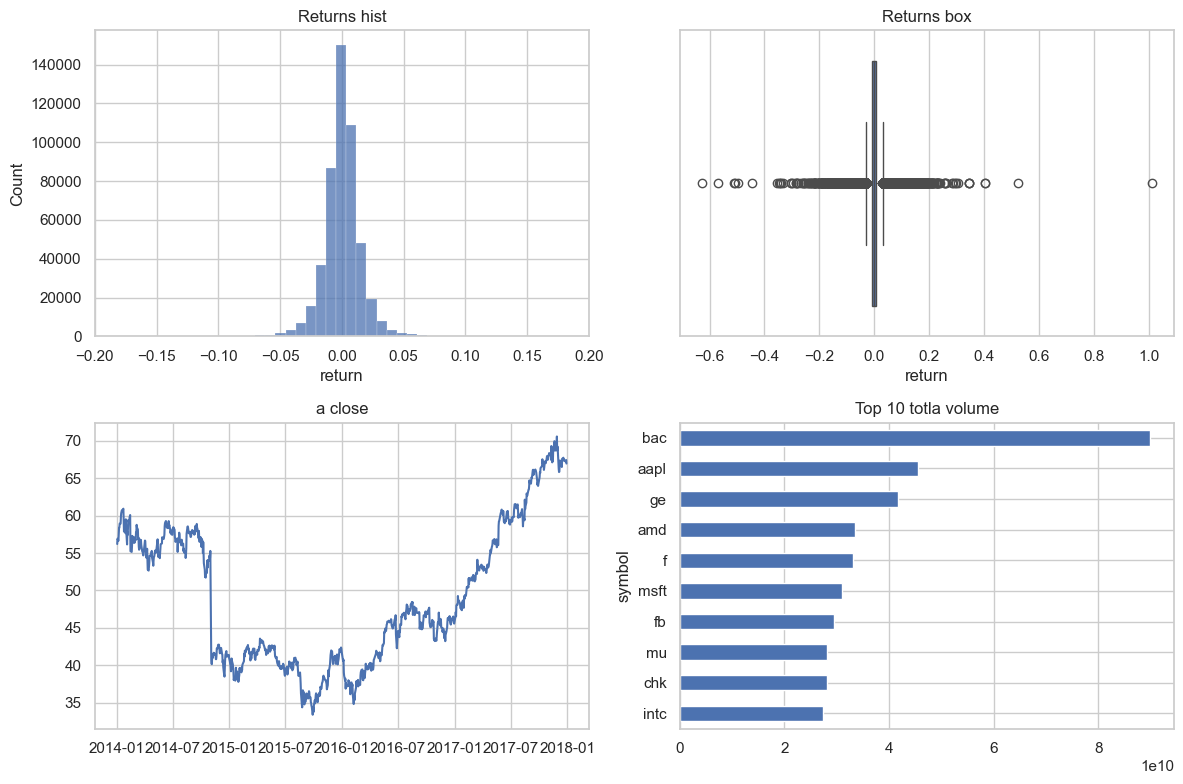

In [14]:
# Cell 13 - Multiple plots in one figure (subplots) this is ths 2x2 subplot sample we can say it is like  a report
fig, axes = plt.subplots(2,2, figsize=(12,8))

# histogram
sns.histplot(df['return'].dropna(), bins=200, ax=axes[0,0])
axes[0,0].set_xlim(-0.2,0.2); 
axes[0,0].set_title('Returns hist')

# boxplot
sns.boxplot(x=df['return'].dropna(), ax=axes[0,1])
axes[0,1].set_title('Returns box')

# time series (single symbol)
axes[1,0].plot(sub['date'], sub['close'])
axes[1,0].set_title(f"{sym} close")

# bar top volumes
top_vol.sort_values().plot(kind='barh', ax=axes[1,1])
axes[1,1].set_title("Top 10 totla volume")

plt.tight_layout()
plt.show()

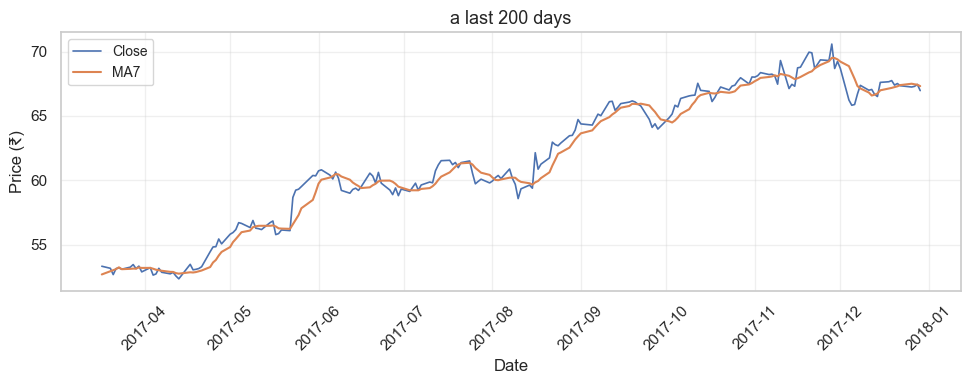

In [16]:
# Cell 14 -  Customize labels, ticks, legends, fonts
plt.figure(figsize=(10,4))
sub2 = sub[-200:]  
plt.plot(sub2['date'], sub2['close'], label='Close', linewidth=1.2)
plt.plot(sub2['date'], sub2['ma7'], label='MA7')
plt.title(f"{sym} last 200 days", fontsize=13)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (₹)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# Cell 15 - Export/save plot as PNG (for reports)
fig = plt.figure(figsize=(10,4))
plt.plot(sub['date'], sub['close'], label='Close')
plt.plot(sub['date'], sub['ma7'], label='MA7')
plt.legend()
plt.title(f"{sym} close + MA7")
plt.xlabel("Date")
plt.ylabel("Price")
plt.tight_layout()

outpath = f"plots/{sym}_close_ma7.png"
fig.savefig(outpath, dpi=300, bbox_inches='tight')
plt.close(fig)
print("Saved plot to:", outpath)

Saved plot to: plots/a_close_ma7.png


In [19]:
# Cell 16 - Interactive saving for many symbols (loop) 
# This is the carefull step

top_syms = df['symbol'].value_counts().head(5).index.tolist()
for s in top_syms:
    subx = df[df['symbol']==s].sort_values('date')
    if subx.empty:
        continue
    fig, ax = plt.subplots(figsize=(8,3))
    ax.plot(subx['date'], subx['close'])
    ax.set_title(s)
    ax.set_xlabel('Date'); ax.set_ylabel('Close')
    fig.tight_layout()
    fp = f"plots/{s}_close.png"
    fig.savefig(fp, dpi=200, bbox_inches='tight')
    plt.close(fig)
print("Saved small charts for top 5 symbols.")    

Saved small charts for top 5 symbols.
